In [1]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr, kstest, mannwhitneyu, ttest_ind, levene, kruskal
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv('lab2.csv')
df.drop('name', axis=1, inplace = True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
df.shape

(195, 24)

In [5]:
df.isna().sum() # Нет пропусков

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
df.duplicated().sum() # Нет дубликатов

0

In [29]:
target = 'status'
features = list(df.columns)
features.remove('status')

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [31]:
df[target].value_counts() # Дисбаланс классов

1    147
0     48
Name: status, dtype: int64

In [34]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

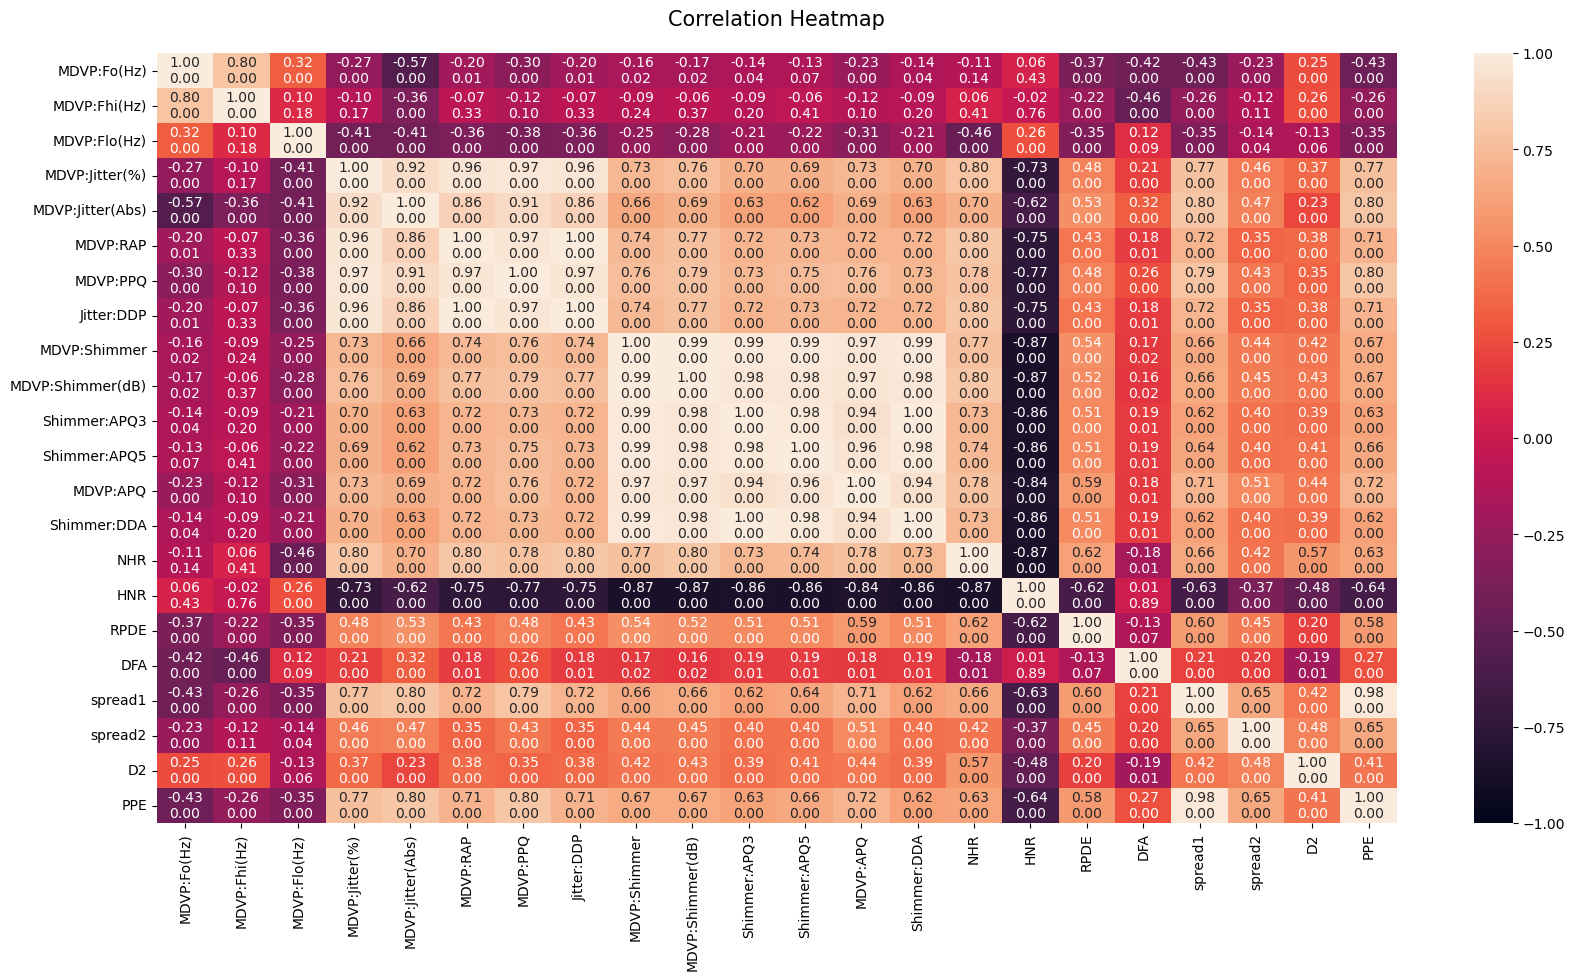

In [49]:
correlation = df[features].corr(method = 'spearman')
table = [[spearman_test(df[i], df[j]) for i in features] for j in features]
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=table, fmt='' )
heatmap.set_title('Correlation Heatmap', fontdict ={'fontsize':15}, pad=20);

In [50]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')